## Assignment 2 Part 4: Geopandas
#### Margaret Chingos | 220000060
#### Github link: https://github.com/margaretchingos/Assignment-2/tree/main?tab=readme-ov-file#assignment-2


##### mount my drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Install libraries

In [ ]:
pip install contextily

In [ ]:
pip install mapclassify

In [ ]:
pip install geopandas

In [ ]:
pip install fiona

In [ ]:
pip install shapely

In [ ]:
pip install pyproj

In [ ]:
pip install rtree

In [ ]:
pip install folium

In [ ]:
pip install matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import contextily as ctx
import rasterio as rio
from rasterio import plot

plt.rcParams['figure.figsize'] = [10, 8] #sets parameters for all graphic outputs

##### Task 1: Import data from shapefile in google drive

<Axes: >

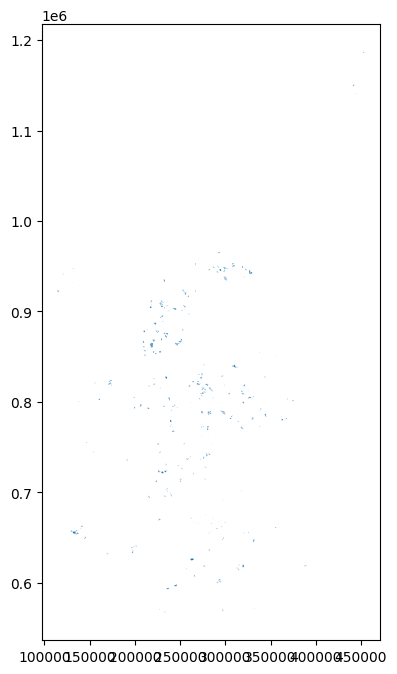

In [ ]:
data = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/PACRP_SCOTLAND.shp')
data.plot()

##### Task 2: Use the correct code to plot the first 5 and the last 5 sets of records in your selected dataset.

In [ ]:
data.head() #.head shows the first 5 rows of the dataframe

,id,grant_id,project_na,subsite_nu,peatland_c,current_us,techniques,local_auth,subsite_ar,reported_h,...,reported_7,reported_8,reported_9,reporte_10,reporte_11,reporte_12,last_updat,Shape_Leng,Shape_Area,geometry
0,1.0,12359,Airds Moss Peatland Restoration,1.0,NULL,NULL,fencing and grazing management,East Ayrshire,5653382.68,220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-10T14:21:04.251Z,10864.606601,5.653383e+06,"POLYGON ((261969.299 625275.445, 261762.923 62..."
1,2.0,12414,Dundreggan Peatland Restoration Pilot Project,1.0,Not provided,NULL,"conifer removal, mulching, drain blocking, fur...",Highland,20839.09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-10T14:21:04.251Z,602.296060,2.083909e+04,"POLYGON ((227656.9 816302.163, 227675.775 8163..."
2,3.0,12414,Dundreggan Peatland Restoration Pilot Project,2.0,Not provided,NULL,"conifer removal, mulching, drain blocking, fur...",Highland,47809.44,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-10T14:21:04.251Z,860.747070,4.780944e+04,"POLYGON ((227934.4 815812.163, 228006.9 815707..."
3,4.0,12414,Dundreggan Peatland Restoration Pilot Project,3.0,Not provided,NULL,"conifer removal, mulching, drain blocking, fur...",Highland,192607.99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-10T14:21:04.251Z,2105.218858,1.926080e+05,"POLYGON ((228268.938 815231.92, 228215.98 8149..."
4,5.0,12415,The Red Moss of Leys Recovery Project,1.0,Not provided,NULL,tree and scrub removal,Aberdeenshire,752164.78,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-10T14:21:04.251Z,3820.280698,7.521647e+05,"POLYGON ((374169.509 801468.792, 374656.344 80..."


In [ ]:
data.tail() #.tail shows the last 5 rows of the dataframe

,id,grant_id,project_na,subsite_nu,peatland_c,current_us,techniques,local_auth,subsite_ar,reported_h,...,reported_7,reported_8,reported_9,reporte_10,reporte_11,reporte_12,last_updat,Shape_Leng,Shape_Area,geometry
485,486.0,PEAT0075,Benmore West,2.0,Forested previously forested,Forestry,Block drains with peat dams and remove non nat...,Highland,1384882.84,0.0,...,0.0,0.0,0.0,10.0,97.5,0.0,2024-10-10T14:21:04.251Z,13225.029833,1.384883e+06,"MULTIPOLYGON (((230507.13 907372.48, 230530.94..."
486,487.0,PEAT0079,Limerigg - Salterhill Moss Restoration,1.0,NULL,NULL,None,Falkirk,50123.90,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,2024-10-10T14:21:04.251Z,1026.853758,5.012390e+04,"POLYGON ((286251.704 671397.129, 286240.513 67..."
487,488.0,PEAT0096,West Lussa - 39024 Drumore Burn,1.0,Forested previously forested,Forestry,Stump flipping,Argyll and Bute,423353.24,0.0,...,0.0,0.0,0.0,0.0,42.0,0.0,2024-10-10T14:21:04.251Z,3906.405724,4.233532e+05,"POLYGON ((169786.033 632321.359, 169482.423 63..."
488,489.0,SW003,Loch Fasgro - Phase 1,1.0,Actively eroding Drained,Other please specify in Notes field Not provid...,"Drain blocking, Gully block and reprofiling, H...",Eilean Siar,70454.40,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,2024-10-10T14:21:04.251Z,1488.196264,7.045440e+04,"POLYGON ((120417.684 941699.483, 120438.563 94..."
489,490.0,SW004,Loch Fasgro - Phase 2,1.0,Actively eroding Drained,Rough grazing,"Drain reprofiling, Gully blocking, Gully repro...",Eilean Siar,206443.18,0.0,...,0.0,0.0,0.0,17.0,0.0,0.0,2024-10-10T14:21:04.251Z,2301.940682,2.064432e+05,"POLYGON ((121407.174 940875.973, 121407.312 94..."


##### Task 3:  Create a map where you can explore the selected dataset. Try to plot the map using some  categorical attribute. Include a ToolTip.

In [ ]:
data.explore(column='local_auth', cmap='RdYlBu', tooltip=["current_us"])
#this explore the data. It assigns a different color to each local authority. When you hover over each section it tells you its current use.

##### Task 4: What is the Coordinate Reference System of the selected dataset?

In [ ]:
data.crs
#this tells you the coordinate reference system
#The coordinate reference system is the British National Grid

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

#### Task 5: How many features does the selected dataset contain?

In [75]:
data.shape #this shows the number of features in the dataset. There are 490 rows and 26 columns

(490, 26)

#### Task 6: Define a sub-setting filter to create a new geopandas dataframe where you filter the selected dataset based on a categorical attribute.

In [88]:
Highland = data[data['local_auth']=='Highland'] #this defines 'Highland' as a subset of data located within the highlands
Highland

#### Task 7:  Define a sub-setting filter to create a new geopandas dataframe where you filter the  selected dataset based on a numerical attribute.

In [ ]:
large = data[data['Shape_Area']>=2000000] #this defines 'large' as a subset of peatbogs that are greater than or equal to 2000000 in area
large

#### Task 8: Plot the new/filtered geopandas dataframe using one of the attributes to create a  choropleth map.

<Axes: >

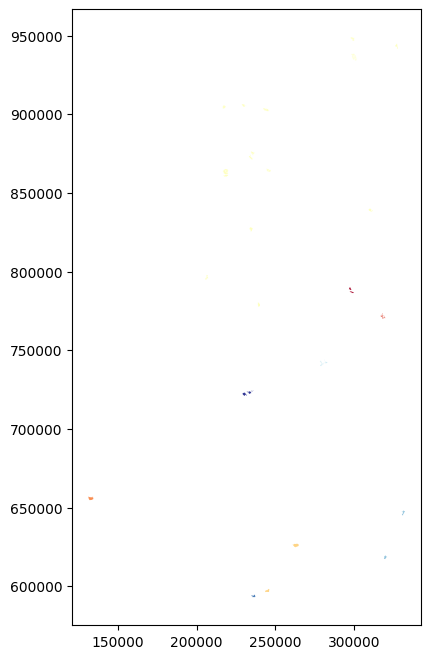

In [87]:
large.plot(column='local_auth', cmap='RdYlBu')
#this makes a chloropleth map that shows the 'large' peatbogs colored by local authority. While this is not particularly helpful given the small size of the peatbogs, this code can be used for different datasets.